In [1]:
import numpy as np
import pandas as pd
import os
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv(r"E:\DATA SCIENCE & AI\DATASET\youtube_comment_analysis\final_processed_df.csv")

In [3]:
df.isnull().sum()

clean_comment    131
category           0
dtype: int64

In [4]:
df.dropna(subset=['clean_comment'],inplace=True)

In [5]:
df.isnull().sum()

clean_comment    0
category         0
dtype: int64

In [6]:
import dagshub
dagshub.init(repo_owner='Pravat-21', repo_name='ML-Project-YouTube-Comment-Analysis', mlflow=True)
mlflow.set_tracking_uri("https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow")

Accessing as Pravat-21

Initialized MLflow to track repo "Pravat-21/ML-Project-YouTube-Comment-Analysis"

Repository Pravat-21/ML-Project-YouTube-Comment-Analysis initialized!

### Handling Imbalanced data:

In [8]:
from collections import Counter

In [9]:
Counter(df['category'])

Counter({1: 15770, 0: 12644, -1: 8248})

In [10]:
for key, value in Counter(df['category']).items():
    print(f"Class {key} has {round(Counter(df['category'])[key]/df.shape[0]*100,2)} % data.")

Class 1 has 43.01 % data.
Class -1 has 22.5 % data.
Class 0 has 34.49 % data.


In [11]:
mlflow.set_experiment("Exp-4: Imbalanced techniques")

<Experiment: artifact_location='mlflow-artifacts:/a5e87be6e3324fcf86f1b6bc929ed89e', creation_time=1763724862475, experiment_id='4', last_update_time=1763724862475, lifecycle_stage='active', name='Exp-4: Imbalanced techniques', tags={'Description': 'Imbalance_method = class_weights',
 'Experiment_type': 'Imbalance Handling',
 'mlflow.runName': 'Imbalanced method-class_weights-RandomForest-TFIDF-Trigram',
 'model_type': 'RandomForestClassifier'}>

In [12]:
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

2025/11/21 17:54:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Imbalanced method-class_weights-RandomForest-TFIDF-Trigram at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/4/runs/966d40075c864bd99fe517f502f108b8
🧪 View experiment at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/4


2025/11/21 17:55:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Imbalanced method-Oversampling-RandomForest-TFIDF-Trigram at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/4/runs/877a9ed67e2347aa8693e11c31d29a02
🧪 View experiment at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/4


2025/11/21 17:56:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Imbalanced method-ADASYN-RandomForest-TFIDF-Trigram at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/4/runs/236423eb808b46db8b30d1690eef6b56
🧪 View experiment at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/4


2025/11/21 17:57:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Imbalanced method-Undersampling-RandomForest-TFIDF-Trigram at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/4/runs/ab705e778b414760bd90e9727f4632ed
🧪 View experiment at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/4


2025/11/21 17:59:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Imbalanced method-smote_enn-RandomForest-TFIDF-Trigram at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/4/runs/7686eb04536b40d390e6d00fadf35e64
🧪 View experiment at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/4


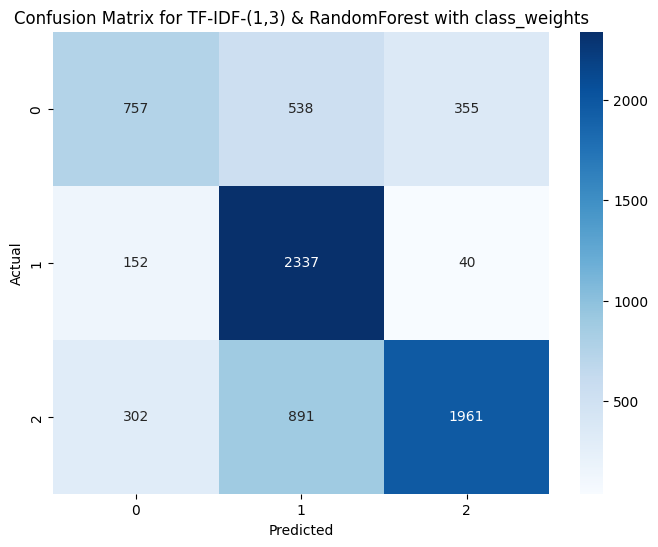

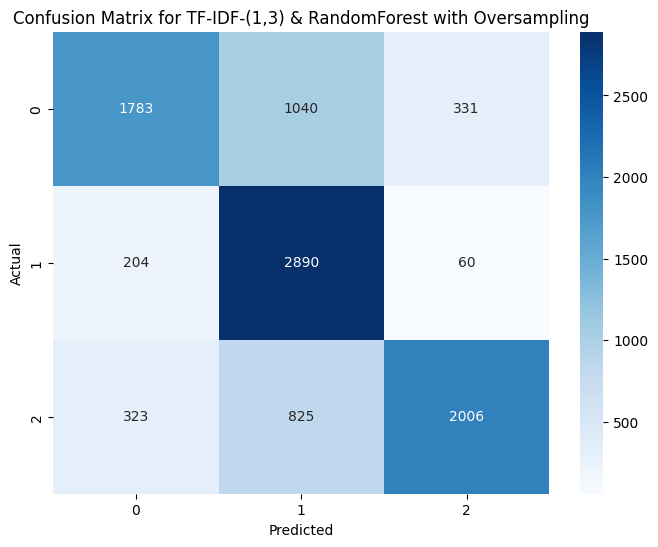

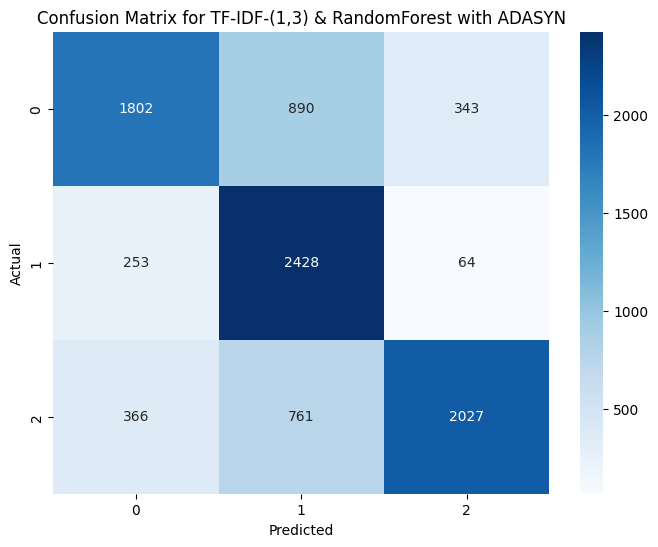

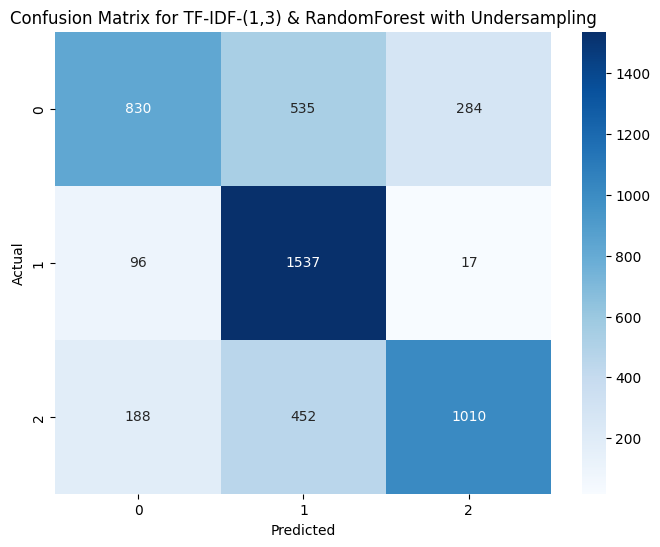

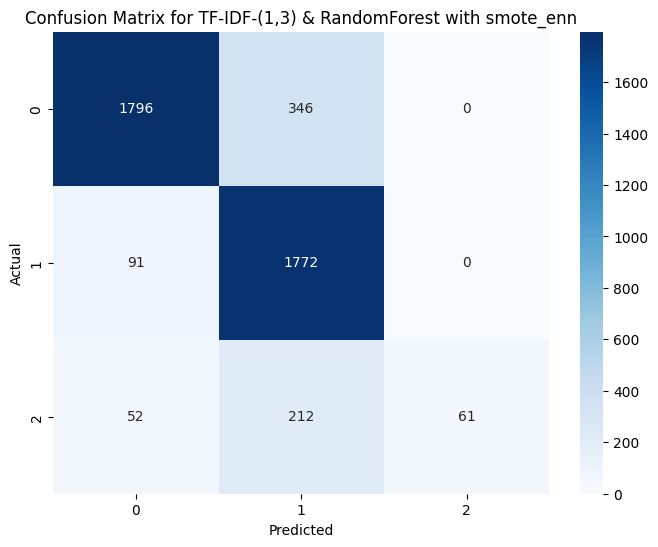

In [ ]:
def run_imbalanced_exp(imbalanced_method):
    ngram_range = (1,3)
    max_feature = 800

    vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=max_feature)
    X = vectorizer.fit_transform(df['clean_comment'])
    y= df["category"]

    if imbalanced_method == "class_weights":
        class_weight = "balanced"
    else:
        class_weight = None
    
    if imbalanced_method == "Oversampling":
        smote = SMOTE(random_state=21)
        X,y = smote.fit_resample(X,y)

    elif imbalanced_method == "ADASYN":
        adasyn = ADASYN(random_state=21)
        X,y = adasyn.fit_resample(X,y)

    elif imbalanced_method == "Undersampling":
        under_sm = RandomUnderSampler(random_state=21)
        X,y = under_sm.fit_resample(X,y)

    elif imbalanced_method == "smote_enn":
        enn = SMOTEENN(random_state=21)
        X,y = enn.fit_resample(X,y)
    

    X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)


    with mlflow.start_run() as run:

        mlflow.set_tags({
            "mlflow.runName": f"Imbalanced method-{imbalanced_method}-RandomForest-TFIDF-Trigram",
            "Experiment_type":"Imbalance Handling",
            "model_type":"RandomForestClassifier",
            "Description":f"Imbalance_method = {imbalanced_method}"

        })

        n_estimators=200
        max_depth=20

        mlflow.log_params({
            "Vectorizer-Type": "TF-IDF",
            "Max-Features":max_feature,
            "ngram-range": ngram_range,
            "RF-n_estimators":n_estimators,
            "RF-max_depth":max_depth,
            "imbalance_method":imbalanced_method
        })


        model=RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,
                                     random_state=42,class_weight=class_weight)
        model.fit(X_train,y_train)

        y_pred=model.predict(X_test)
        
        accuracy=accuracy_score(y_test,y_pred)
        
        mlflow.log_metric("accuracy",accuracy)


        class_rep = classification_report(y_test,y_pred,output_dict=True)
        
        for label, metrics in class_rep.items():
            if isinstance(metrics, dict):  # for precision, recall, f1-score
                for metric, value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric}", value)
                    
        con_matrix = confusion_matrix(y_test,y_pred)

        plt.figure(figsize=(8,6))
        sns.heatmap(con_matrix,annot=True, fmt="d",cmap="Blues")
        plt.title(f"Confusion Matrix for TF-IDF-(1,3) & RandomForest with {imbalanced_method}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")

        plt.savefig(f"TF-IDF_trigram_confusion_matrix.png")
        
        mlflow.log_artifact(f"TF-IDF_trigram_confusion_matrix.png")
        
        mlflow.sklearn.log_model(model, f"Random_Forest_classifier_TF-IDF_trigram_with_{imbalanced_method}")



imbalanced_method = ["class_weights","Oversampling","ADASYN","Undersampling","smote_enn"]

for mehtod in imbalanced_method:
    run_imbalanced_exp(mehtod)

